## Lab-8

## M Deekshith Reddy

## BL.EN.U4AIE21081

In [ ]:
# A1

import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout

# Load the recorded speech signal
audio_file = r"sp2_anvith.wav"
y, sr = librosa.load(audio_file, sr=None)

# Preprocessing
# Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Mel-Frequency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Prepare input data for the LSTM model
X = mfccs.T  # Transpose the MFCC matrix to match the shape expected by the LSTM model
X = X.reshape(X.shape[0], X.shape[1], 1)  # Add channel dimension

# Define LSTM model
num_classes = 10  # Replace with the actual number of classes in your dataset
model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X.shape[1], 1)),
    TimeDistributed(Dense(units=64, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(units=num_classes, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 13, 256)          133120    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 13, 64)           16448     
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 13, 128)          66048     
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 13, 10)           1290      
 tributed)                                              

In [ ]:
# A2

import os
import tempfile
import speech_recognition as sr
import pyttsx3

# Get a temporary directory where you have write permissions
custom_temp_dir = r"C:\Users\natsu\OneDrive\Desktop"

# Transcribe the audio file
audio_file = r"C:\Users\natsu\Downloads\Bhanumathi_weds_Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# Define a function to segment phonemes
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

# Synthesize speech for the word "Bharat"
engine = pyttsx3.init()
output_file = os.path.join(custom_temp_dir, "bharat_speech.wav")
engine.save_to_file(phonemes, output_file)
engine.runAndWait()

In [ ]:
import IPython.display as ipd
import numpy as np
from scipy.io import wavfile

# Load the audio file
sampling_rate, audio_data = wavfile.read(r"C:\Users\natsu\OneDrive\Desktop\bharat_speech.wav")

# Display the audio
ipd.display(ipd.Audio(data=audio_data, rate=sampling_rate))

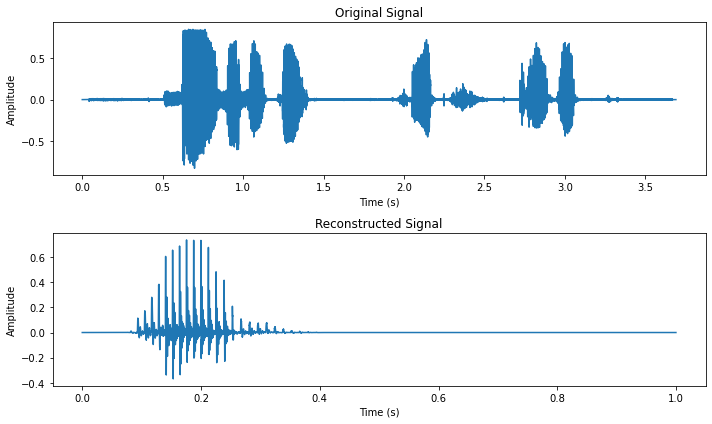

In [ ]:
import matplotlib.pyplot as plt

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()